In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tournament.agents.agents import AGENTS
from tournament.agents.axelrod_first import (
    Davis,
    Downing,
    Feld,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
)
from tournament.agents.constant import AllC, AllD
from tournament.agents.pavlov import Pavlov
from tournament.agents.q_learning.tabular import TabularQLearner
from tournament.agents.tft import (
    TFTT,
    TTFT,
    GenerousTFT,
    GradualTFT,
    OmegaTFT,
    TitForTat,
)
from tournament.environments.multiple import MultipleRuleBasedAgentEnvironment
from tournament.tournament import RoundRobinTournament

# plt.rcParams["figure.figsize"] = (20, 12)
plt.rcParams["figure.figsize"] = (10, 6)


In [2]:
# env = SingleRuleBasedAgentEnvironment(TitForTat)
env = MultipleRuleBasedAgentEnvironment([
    TitForTat,
    # AllC,
    # TFTT,
    # TTFT,
    # GenerousTFT,
    # GradualTFT,
    OmegaTFT,
])

In [3]:
class TabularLearnerTest(TabularQLearner):
    def __init__(self):
        super().__init__()
        self._lookback = 4
        self.epsilon = 0.2

agent = TabularLearnerTest()

In [4]:
env.train(
    trainee=agent,
    limit=25000,
    epochs=150,
)

[03:59:55] Commencement of training.
[03:59:58] Completed epoch 1: None
[04:00:00] Completed epoch 2: None
[04:00:02] Completed epoch 3: None
[04:00:04] Completed epoch 4: None
[04:00:07] Completed epoch 5: None
[04:00:09] Completed epoch 6: None
[04:00:12] Completed epoch 7: None
[04:00:14] Completed epoch 8: None
[04:00:16] Completed epoch 9: None
[04:00:18] Completed epoch 10: None
[04:00:20] Completed epoch 11: None
[04:00:23] Completed epoch 12: None
[04:00:25] Completed epoch 13: None
[04:00:27] Completed epoch 14: None
[04:00:29] Completed epoch 15: None
[04:00:32] Completed epoch 16: None
[04:00:34] Completed epoch 17: None
[04:00:36] Completed epoch 18: None
[04:00:39] Completed epoch 19: None
[04:00:42] Completed epoch 20: None
[04:00:44] Completed epoch 21: None
[04:00:46] Completed epoch 22: None
[04:00:49] Completed epoch 23: None
[04:00:51] Completed epoch 24: None
[04:00:53] Completed epoch 25: None
[04:00:55] Completed epoch 26: None
[04:00:57] Completed epoch 27: None


In [5]:
print(env.counts)

s = sum(env.counts.values())

print({a: env.counts[a] / s for a in env.counts})

{<Action.COOPERATE: 0>: 5644807, <Action.DEFECT: 1>: 1855193}
{<Action.COOPERATE: 0>: 0.7526409333333334, <Action.DEFECT: 1>: 0.24735906666666665}


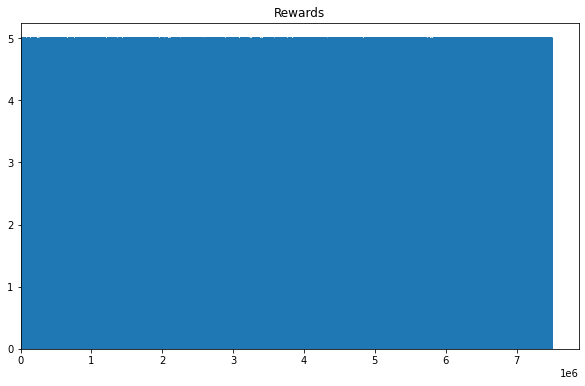

In [6]:
plt.title("Rewards")
plt.plot(env.rewards)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

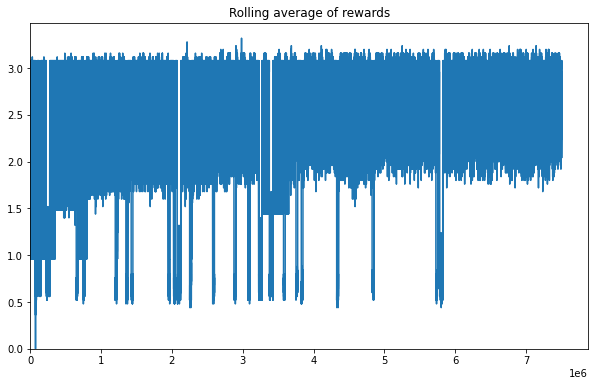

In [7]:
N = 25

plt.title("Rolling average of rewards")
plt.plot(np.convolve(env.rewards, np.ones(N), mode='valid') / N)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

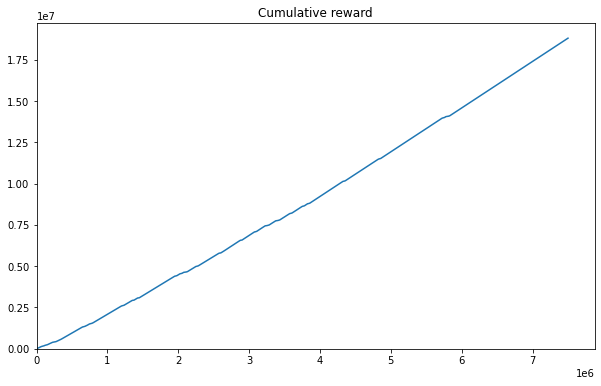

In [8]:
plt.title("Cumulative reward")
plt.plot(np.cumsum(env.rewards))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

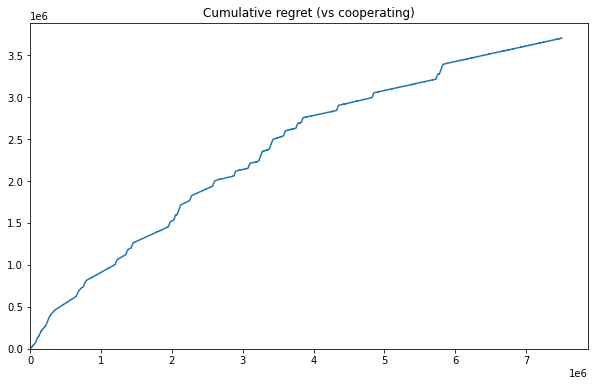

In [9]:
plt.title("Cumulative regret (vs cooperating)")
plt.plot(np.cumsum(3 - np.array(env.rewards)))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

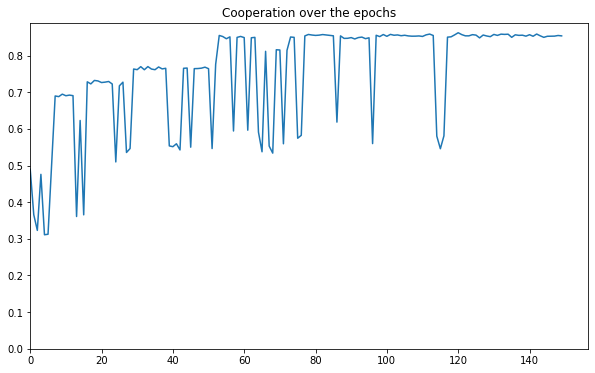

In [10]:
from tournament.action import Action

plt.title("Cooperation over the epochs")
plt.plot([x[Action.COOPERATE] for x in env.normalised_epoch_counts])
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

In [11]:
tournament = RoundRobinTournament(AGENTS, [agent])

scores, times = tournament.play(
    continuation_probability=0.99654, repetitions=20, jobs=12
)

results = [
    (agent, round(sum(scores[agent]) / len(scores[agent])), sum(times[agent]))
    for agent in scores
]
results.sort(key=lambda x: x[1], reverse=True)

for c, score, time in results:
    print(f"{c.__name__:<30} {score:<20} {time:<20}")


100%|██████████| 961/961 [00:26<00:00, 35.63matches/s] 

SecondByBlackK83R              796                  8.284999            
Davis                          788                  10.776037000000004  
TTFT                           788                  5.436948999999999   
SecondByGraaskampKatzen        787                  5.767062999999999   
Champion                       781                  38.32001800000001   
Nydegger                       778                  7.931959999999998   
TFTT                           778                  5.597064999999999   
SteinAndRapoport               777                  21.878029           
Borufsen                       773                  6.775983999999998   
OmegaTFT                       771                  5.846950999999999   
Shubik                         768                  6.002983000000001   
GenerousTFT                    768                  4.901994000000002   
TitForTat                      767                  5.116963000000002   
TidemanAndChieruzzi            767                 